In [1]:
library(tidyverse) #Reading data
library(lubridate) #Reading and manipulating dates and times
library(readr) #Reading the CSV data file
library(DBI)
library(RMariaDB)
library(RSQLite)
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Load in the data set
games_data = read.csv("games.csv")

In [3]:
#Display the structure of the dataset
glimpse(games_data)

Rows: 1,512
Columns: 14
$ X                 <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ Title             <chr> "Elden Ring", "Hades", "The Legend of Zelda: Breath …
$ Release.Date      <chr> "Feb 25, 2022", "Dec 10, 2019", "Mar 03, 2017", "Sep…
$ Team              <chr> "['Bandai Namco Entertainment', 'FromSoftware']", "[…
$ Rating            <dbl> 4.5, 4.3, 4.4, 4.2, 4.4, 4.3, 4.2, 4.3, 3.0, 4.3, 4.…
$ Times.Listed      <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6K"…
$ Number.of.Reviews <chr> "3.9K", "2.9K", "4.3K", "3.5K", "3K", "2.3K", "1.6K"…
$ Genres            <chr> "['Adventure', 'RPG']", "['Adventure', 'Brawler', 'I…
$ Summary           <chr> "Elden Ring is a fantasy, action and open world game…
$ Reviews           <chr> "[\"The first playthrough of elden ring is one of th…
$ Plays             <chr> "17K", "21K", "30K", "28K", "21K", "33K", "7.2K", "9…
$ Playing           <chr> "3.8K", "3.2K", "2.5K", "679", "2.4K", "1.8K", "1.1K…
$ Backlogs      

In [4]:
#Check for missing values
missing_values = colSums(is.na(games_data))
print(missing_values)

                X             Title      Release.Date              Team 
                0                 0                 0                 0 
           Rating      Times.Listed Number.of.Reviews            Genres 
               13                 0                 0                 0 
          Summary           Reviews             Plays           Playing 
                0                 0                 0                 0 
         Backlogs          Wishlist 
                0                 0 


In [5]:
#check for duplicates
duplicate_rows = games_data[duplicated(games_data) | duplicated(games_data, fromLast = TRUE), ]

#Print duplicates:
print("Duplicate Rows:")
duplicate_rows

[1] "Duplicate Rows:"


X,Title,Release.Date,Team,Rating,Times.Listed,Number.of.Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [6]:
#What are the data types for each column?
print("Original Data Types:")
print(sapply(games_data, class))

[1] "Original Data Types:"
                X             Title      Release.Date              Team 
        "integer"       "character"       "character"       "character" 
           Rating      Times.Listed Number.of.Reviews            Genres 
        "numeric"       "character"       "character"       "character" 
          Summary           Reviews             Plays           Playing 
      "character"       "character"       "character"       "character" 
         Backlogs          Wishlist 
      "character"       "character" 


In [7]:
#Convert data types if needed. This is VERY common for dates and times. Library(lubridate) works well with dates.
#Example: #Convert column to an integer type
games_data$Rating = as.integer(games_data$Rating)

#What are the updated column types?
    print("Updated Data Types:")
    print(sapply(games_data$Rating, class))

[1] "Updated Data Types:"
   [1] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
   [8] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [15] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [22] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [29] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [36] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [43] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [50] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [57] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [64] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [71] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [78] "integer" "integer" "integer" "integer" "integer" "integer" "integer"
  [85] "integer" "integer" "integer" "integer" "in

In [8]:
# Shows the column name
column_names = names(games_data)
# Make all column names lowercase:
column_names = tolower(column_names)
# Changes the column names and puts them back into the main data frame
names(games_data) = column_names

# Prints the results
names(games_data)

[1] "x"                 "title"             "release.date"     
 [4] "team"              "rating"            "times.listed"     
 [7] "number.of.reviews" "genres"            "summary"          
[10] "reviews"           "plays"             "playing"          
[13] "backlogs"          "wishlist"

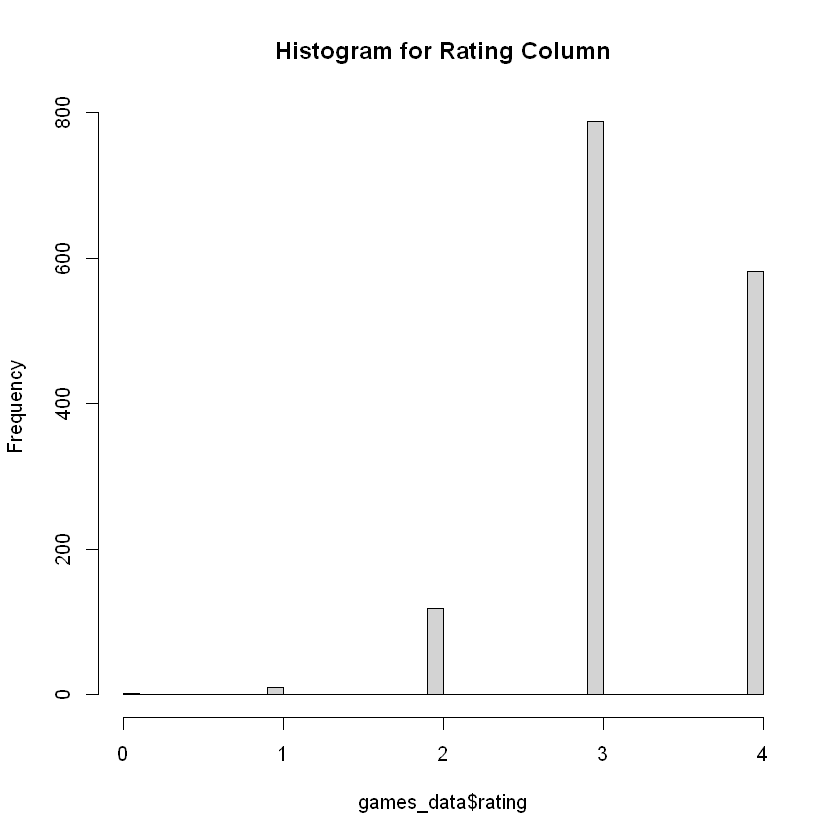

In [9]:
# There is an outlier at the 1 rating, most of the ratings are around the 2 - 4 ratings.
hist(games_data$rating, main = "Histogram for Rating Column", breaks = 30)

In [10]:
# Shows the column name
column_names = names(games_data)
# Replaces all the periods in the name with underscore 
column_names <- gsub("\\.", "_", column_names) 
# Changes the column names and puts them back into the main data frame
names(games_data) = column_names

# creates the game_id column
names(games_data)[1] <- "game_id"

# Prints the results
print(names(games_data))

 [1] "game_id"           "title"             "release_date"     
 [4] "team"              "rating"            "times_listed"     
 [7] "number_of_reviews" "genres"            "summary"          
[10] "reviews"           "plays"             "playing"          
[13] "backlogs"          "wishlist"         


In [11]:
# Change the release date to data format
games_data$release_date = mdy(games_data$release_date)


head(games_data$release_date)

Warning message:
" 3 failed to parse."


[1] "2022-02-25" "2019-12-10" "2017-03-03" "2015-09-15" "2017-02-24"
[6] "2011-11-18"

In [12]:
# Remove the K and add ",000" to the number. 
# Function to perform replacements
replace_function <- function(x) {
    x <- gsub("\\.", "", x)
    x <- gsub("K", "00", x)
return(x)
}

# Columns to apply the replacements
columns_to_modify = c("playing", "plays","wishlist", "backlogs", "times_listed","number_of_reviews")

# Modifies the column
games_data[columns_to_modify] = lapply(games_data[columns_to_modify], replace_function)

# Converts the characters into integers
for (col in columns_to_modify) {
    games_data[[col]] = as.integer(as.character(games_data[[col]]))
}

# View a glimpse of the dataframe
glimpse(games_data)


Rows: 1,512
Columns: 14
$ game_id           <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ title             <chr> "Elden Ring", "Hades", "The Legend of Zelda: Breath …
$ release_date      <date> 2022-02-25, 2019-12-10, 2017-03-03, 2015-09-15, 201…
$ team              <chr> "['Bandai Namco Entertainment', 'FromSoftware']", "[…
$ rating            <int> 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4…
$ times_listed      <int> 3900, 2900, 4300, 3500, 300, 2300, 1600, 2100, 867, …
$ number_of_reviews <int> 3900, 2900, 4300, 3500, 300, 2300, 1600, 2100, 867, …
$ genres            <chr> "['Adventure', 'RPG']", "['Adventure', 'Brawler', 'I…
$ summary           <chr> "Elden Ring is a fantasy, action and open world game…
$ reviews           <chr> "[\"The first playthrough of elden ring is one of th…
$ plays             <int> 1700, 2100, 3000, 2800, 2100, 3300, 7200, 9200, 2500…
$ playing           <int> 3800, 3200, 2500, 679, 2400, 1800, 1100, 759, 470, 1…
$ backlogs      

In [13]:
#Save the newly cleaned dataset as a NEW file:
#write.csv(games_data, 'cleaned_games_data.csv')

In [14]:
# load in the data to build the database
review_data = read.csv('cleaned_games_data.csv')

# need to drop teh first column otherwise you will get an error later
review_data = review_data[,-1]

In [45]:
#Connect to the database you created in Assignment #6 using your preferred method.
db <- dbConnect(dbDriver("SQLite"), dbname = "video_game_reviews.db")

In [16]:
# Creates the first table for the dataset 

first_table = "CREATE TABLE IF NOT EXISTS game (
    game_id  INTEGER AUTO_INCREMENT PRIMARY KEY,
    title TEXT,
    release_date TEXT,
    team TEXT,
    genres TEXT,
    summary TEXT
);"

# Executes the table
dbExecute(db, first_table)

[1] 0

In [17]:
# View if the columns were loaded in correctly 
dbListTables(db)

[1] "game"

In [18]:
# The table that was created
table_name = "game"

# Write a query to show the column names from the created table
query_table_1 = paste0("PRAGMA table_info(", table_name,");")

#Retrieves the column names from the table we created 
db_columns = dbGetQuery(db, query_table_1)$name

#Define teh common columns between the CSV and Database 
common_columns_first_table = intersect(colnames(review_data), db_columns)

#These are teh column tables 
common_columns_first_table

[1] "game_id"      "title"        "release_date" "team"         "genres"      
[6] "summary"

In [19]:
# Creates a subset of teh data using the original csv taking only 
# the specified column names 
game_subset = review_data[, common_columns_first_table]

# Writes the data into the table 
dbWriteTable(db, "game", game_subset, append = TRUE, row.names = FALSE)

In [48]:
# checks the data in the table
preview_game = dbReadTable(db, "game")

head(preview_game, 2)

,game_id,title,release_date,team,genres,summary
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']","['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world game with RPG elements such as stats, weapons and spells. Rise, Tarnished, and be guided by grace to brandish the power of the Elden Ring and become an Elden Lord in the Lands Between."
2,1,Hades,2019-12-10,['Supergiant Games'],"['Adventure', 'Brawler', 'Indie', 'RPG']","A rogue-lite hack and slash dungeon crawler in which Zagreus, son of Hades the Greek god of the dead, attempts to escape his home and his oppressive father by fighting the souls of the dead through the various layers of the ever-shifting underworld, while getting to know and forging relationships with its inhabitants."


In [21]:
# Create the table
second_table = "CREATE TABLE IF NOT EXISTS reviews (
    game_id INTEGER,
    rating INTEGER,
    times_listed INTEGER,
    number_of_reviews INTEGER,
    reviews TEXT,
    FOREIGN KEY (game_id) REFERENCES game(game_id) 
);"
# Executes the table
dbExecute(db, second_table)

[1] 0

In [22]:
# View if the columns were loaded in correctly 
dbListTables(db)

[1] "game"    "reviews"

In [23]:
# The table that was created
table_name = "reviews"

# Write a query to show the column names from the created table
query_table_2 = paste0("PRAGMA table_info(", table_name,");")

#Retrieves the column names from the table we created 
db_columns = dbGetQuery(db, query_table_2)$name

#Define teh common columns between the CSV and Database 
common_columns_second_table = intersect(colnames(review_data), db_columns)

#These are teh column tables 
common_columns_second_table

[1] "game_id"           "rating"            "times_listed"     
[4] "number_of_reviews" "reviews"

In [24]:
# Creates a subset of teh data using the original csv taking only 
# the specified column names 
game_subset = review_data[, common_columns_second_table]

# Writes the data into the table 
dbWriteTable(db, "reviews", game_subset, append = TRUE, row.names = FALSE)

In [49]:
# checks the data in the table
preview_reviews = dbReadTable(db, "reviews")

head(preview_reviews, 2)

,game_id,rating,times_listed,number_of_reviews,reviews
,<int>,<int>,<int>,<int>,<chr>
1,0,4,3900,3900,"[""The first playthrough of elden ring is one of the best eperiences gaming can offer you but after youve explored everything in the open world and you've experienced all of the surprises you lose motivation to go exploring on repeat playthroughs which takes a lot away from the replayability which is a very important thing for from games imo."", 'a replay solidified my love for elden ring. so easily my favorite game of all time. actually beating malenia this time was also an amazing feeling. i just love being in this world man its the greatest of all time', 'The game is absolutely beautiful, with so much to do. The replayability is crazy. And it never gets old with it too.', 'Took everything great about the Soulsborne games and make it 100% better.', 'I play with my overlevelled friend every time and we still fail sometimes (he’s on NG6), insanely difficult game lol\n \n gorgeous graphics, animations, everything about this game is so beautiful. deserves all the hype it gets. If you have a powerful enough pc I definitely recommend you play it on there, if you use keyboard, you’ll want to change the keybinds because the defaults are ass.', ""Tied as my favorite souls game with Bloodborne, truly one I'll keep coming back too.""]"
2,1,4,2900,2900,"['convinced this is a roguelike for people who do not like the genre. The art is technically good but the aesthetic does very little for me, too clean or something. idk wish I liked it but I do not', 'incredible art, a banger soundtrack a surprisingly charming storyline and a big red dog. hades has very smooth gameplay but after playing it for a while it just feels like youre doing the same 3 hit combo ove and over again, which dont get me wrong that combo feels great to do but once i becomes muscle memory you kinda go into autopilot. also i think the boons are cool but i would like to see them change the flow of combat a bit more, there are some cool ones like the grape boon that can change the way you play but most of them are just upgrades that dont really change the gameplay or strategy. other then those 2 small gripes the game is fantastic.', ""People tell me this game gets really really good at some point but i've beaten entire games in the amount of time I gave this game."", 'Não sou muito de jogo indie, admito que joguei poucos, mas devo dizer que Hades foi um dos melhores jogos que joguei na vida, facilmente no top 15. Toda sua arte, dublagem, gameplay, carisma dos personagens, é tudo incrivel', ""I can't shake the feeling that I am thoroughly bored playing Hades. I've picked up Hades three times over the last few years, and three times I've found myself putting down the controller after a handful of hours, especially after reaching the third stage, and I couldn't figure out why it wasn't working for me. After giving it a few good goes, I've finally managed to pin down what it is that just doesn't click for me about Hades."", 'One of my favorites in the rogue-likes/lites, only being beat by binding of Isaac. I love the characters (Thanatos my beloved) and the writing and the art style and RRRAAAAHHH THIS GAME IS AWESOME']"


In [26]:
# Create the table
third_table = "CREATE TABLE IF NOT EXISTS user_activity (
    game_id INTEGER,
    plays INTEGER,
    playing INTEGER,
    backlogs INTEGER,
    wishlist INTEGER,
    FOREIGN KEY (game_id) REFERENCES game(game_id) 
);"

# Executes the table
dbExecute(db, third_table)

[1] 0

In [27]:
# View if the columns were loaded in correctly 
dbListTables(db)

[1] "game"          "reviews"       "user_activity"

In [28]:
# The table that was created
table_name = "user_activity"

# Write a query to show the column names from the created table
query_table_3 = paste0("PRAGMA table_info(", table_name,");")

#Retrieves the column names from the table we created 
db_columns = dbGetQuery(db, query_table_3)$name

#Define teh common columns between the CSV and Database 
common_columns_third_table = intersect(colnames(review_data), db_columns)

#These are teh column tables 
common_columns_third_table

[1] "game_id"  "plays"    "playing"  "backlogs" "wishlist"

In [29]:
# Creates a subset of teh data using the original csv taking only 
# the specified column names 
game_subset = review_data[, common_columns_third_table]

# Writes the data into the table 
dbWriteTable(db, "user_activity", game_subset, append = TRUE, row.names = FALSE)

In [50]:
# checks the data in the table
preview_user_activity = dbReadTable(db, "user_activity")

head(preview_user_activity, 2)

,game_id,plays,playing,backlogs,wishlist
,<int>,<int>,<int>,<int>,<int>
1,0,1700,3800,4600,4800
2,1,2100,3200,6300,3600


In [52]:
#Complete a quick query to ensure your data is available on the server.
test <- dbGetQuery(db, "SELECT * 
                        FROM game
                        LIMIT 10")
head(test, 2)

,game_id,title,release_date,team,genres,summary
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']","['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world game with RPG elements such as stats, weapons and spells. Rise, Tarnished, and be guided by grace to brandish the power of the Elden Ring and become an Elden Lord in the Lands Between."
2,1,Hades,2019-12-10,['Supergiant Games'],"['Adventure', 'Brawler', 'Indie', 'RPG']","A rogue-lite hack and slash dungeon crawler in which Zagreus, son of Hades the Greek god of the dead, attempts to escape his home and his oppressive father by fighting the souls of the dead through the various layers of the ever-shifting underworld, while getting to know and forging relationships with its inhabitants."


**Question:**
<br>
What games had < 2000 plays
<br>
<br>
**What tables are we joining:**
<br>
Games & user_activity

In [53]:
two_k_plays_and_below = dbGetQuery(db, "
                                SELECT g.title, 
                                        SUM(ua.plays) AS total_plays, 
                                        SUM(ua.wishlist) AS total_wait_list
                                FROM game AS g
                                INNER JOIN user_activity ua ON g.game_id = ua.game_id
                                GROUP BY g.title
                                HAVING SUM(ua.plays) <= 2000
                                ORDER BY total_plays DESC
                                LIMIT 5")
two_k_plays_and_below

title,total_plays,total_wait_list
<chr>,<int>,<int>
The Stanley Parable,2000,1666
Super Smash Bros. for Nintendo 3DS,2000,192
Super Meat Boy,2000,1002
Animal Crossing: New Horizons,2000,1100
Ys VIII: Lacrimosa of Dana,1900,575


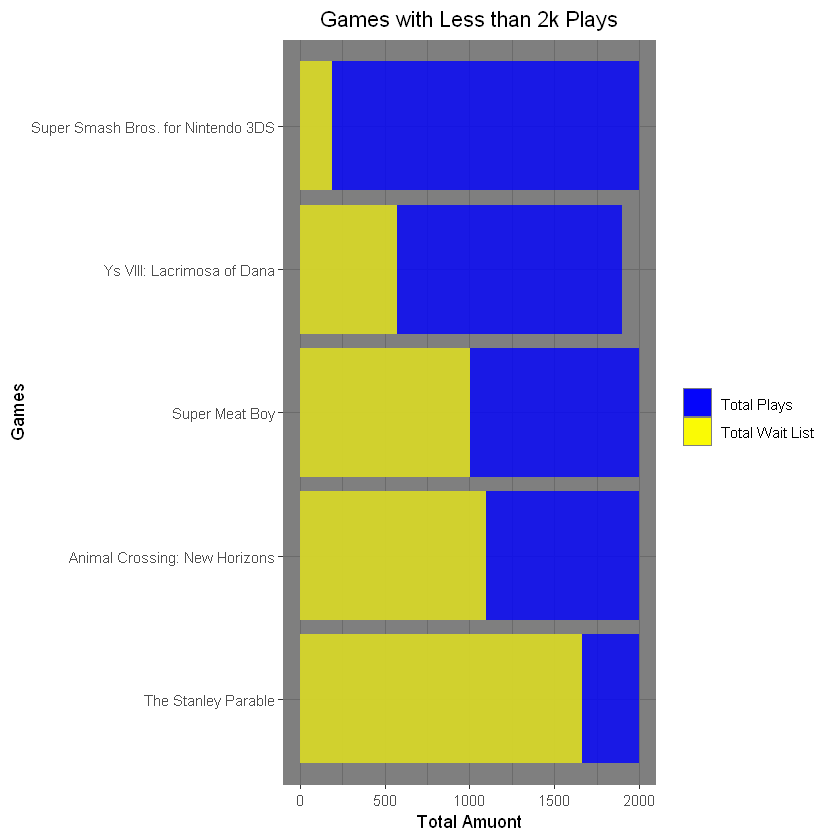

In [54]:
# Create the bar chart
ggplot(two_k_plays_and_below, aes(x = reorder(title, -total_wait_list))) +
  coord_flip()+ 
    geom_col(aes(y = total_plays, fill = "Total Plays"), position = "dodge", alpha = 0.8) +
    geom_col(aes(y = total_wait_list, fill = "Total Wait List"), position = "dodge", alpha = 0.8) +
    labs(
        title = "Games with Less than 2k Plays",
        x = "Games",
        y = "Total Amuont",
    ) +
    scale_fill_manual(values = c("Total Plays" = "blue", "Total Wait List" = "yellow")) +
    theme_dark() +
    theme(
        plot.title = element_text(hjust = 0.5),
        legend.title=element_blank()
    )


**Question:** <br>
What games have a rating of three and how many people have put it on their wish list
<br>
<br>
**What tables are we joining?**<br>
Game, user_activity and reviews

In [34]:
# groups the the title from game table, user_activity table and the reviews table and shows the results of all three tables
games_rated_3 = dbGetQuery(db, "SELECT DISTINCT g.title AS game_title, ua.wishlist, r.rating
                            FROM game g
                            INNER JOIN reviews r ON g.game_id = r.game_id
                            LEFT JOIN user_activity ua ON g.game_id = ua.game_id
                            WHERE r.rating = 3
                            ORDER BY wishlist DESC
                            LIMIT 5")
games_rated_3 

game_title,wishlist,rating
<chr>,<int>,<int>
Stray,3400,3
Cyberpunk 2077,2900,3
Resident Evil Village,2800,3
Marvel's Spider-Man: Miles Morales,2800,3
Shin Megami Tensei V,2600,3


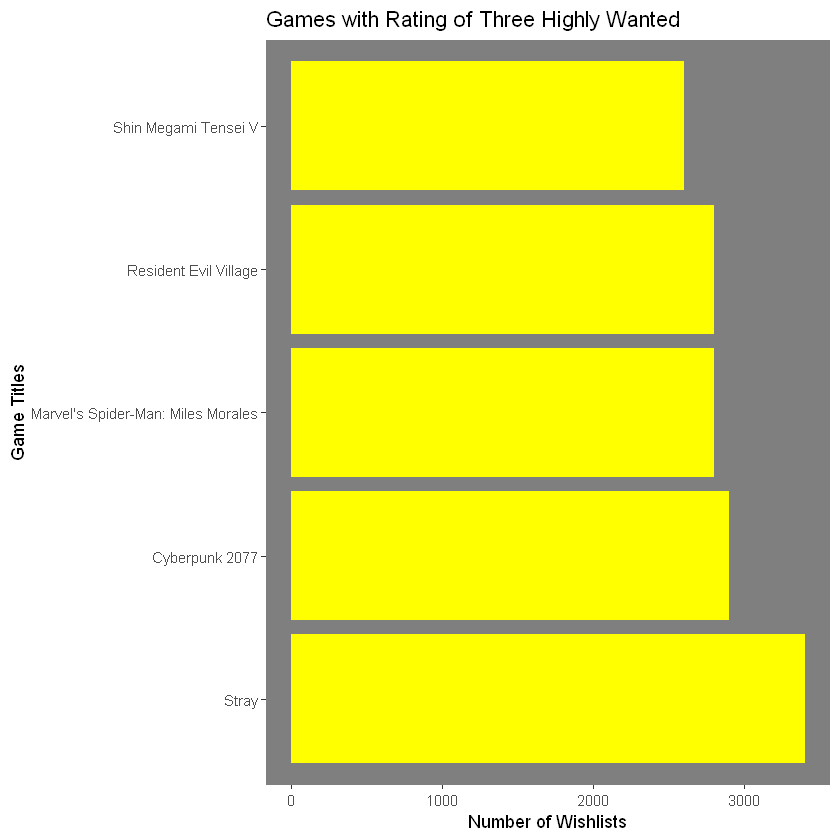

In [35]:
ggplot(games_rated_3, aes(x = reorder(game_title, -wishlist), y = wishlist)) +
  geom_bar(stat = "identity", fill = "yellow") +
  coord_flip() +
  labs(x = "Game Titles", y = "Number of Wishlists", title = "Games with Rating of Three Highly Wanted") +
  theme_dark()+
  theme(panel.grid.major = element_blank(),  
        panel.grid.minor = element_blank())

**Research Question:** <br>
What genres have currently playing of < 2000
<br>
<br>
**What tables are we joining?** <br>
game & user_activity

In [36]:
current_playing_more_5k = dbGetQuery(db, "SELECT DISTINCT g.genres, SUM(ua.plays) AS Currently_Playing
                            FROM game AS g
                            RIGHT JOIN user_activity ua ON g.game_id = ua.game_id
                            GROUP BY g.genres
                            HAVING SUM(ua.plays) > 5000
                            ORDER BY Currently_Playing DESC 
                            LIMIT 5")
current_playing_more_5k 

genres,Currently_Playing
<chr>,<int>
"['Adventure', 'RPG']",454901
"['Adventure', 'Platform']",396234
"['Adventure', 'Shooter']",287379
['Shooter'],236577
"['Adventure', 'RPG', 'Turn Based Strategy']",166500


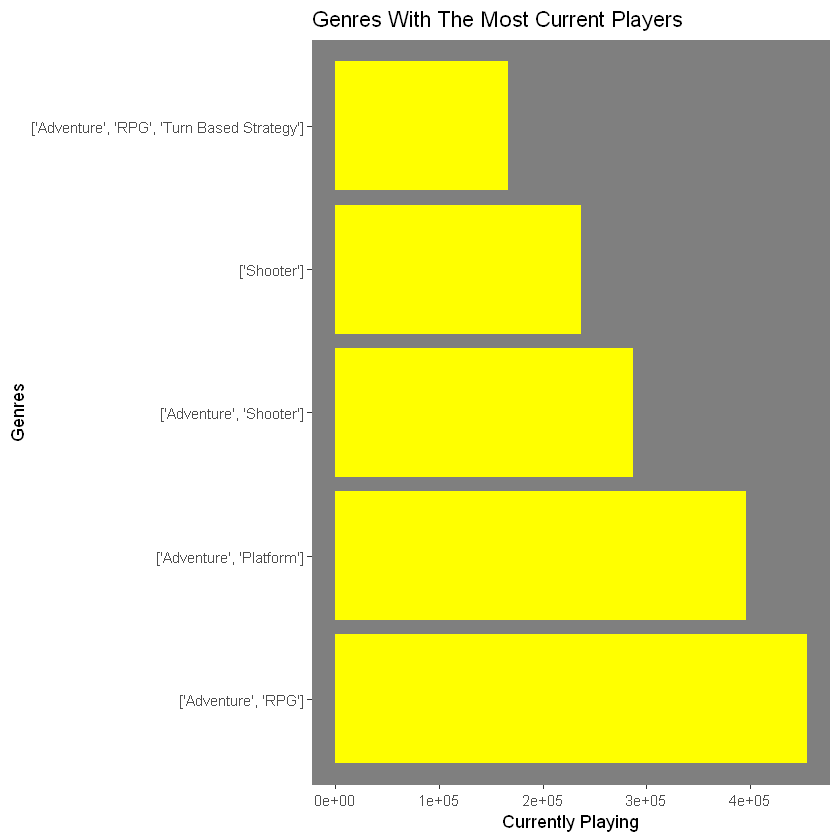

In [37]:
ggplot(current_playing_more_5k, aes(x = reorder(genres, -Currently_Playing), y = Currently_Playing)) +
  coord_flip() +
  geom_bar(stat = "identity", fill = "yellow") +
  labs(x = "Genres", 
        y = "Currently Playing", 
        title = "Genres With The Most Current Players") +
  theme_dark()+
  theme(,
        panel.grid.major = element_blank(),  
        panel.grid.minor = element_blank())

**Question:** <br> 
what games are highly wanted (>= 3000), wanted (>= 2000) and not really wanted (< 2000)
<br>
<br>
**What tables are we joining?:** <br>
games and user activity 

In [38]:
desire_level = dbGetQuery(db, "SELECT g.title, 
                                            SUM(ua.plays) AS total_plays, 
                                            SUM(ua.wishlist) AS total_wait_list
                            FROM game AS g
                            INNER JOIN user_activity ua ON g.game_id = ua.game_id
                            GROUP BY g.title
                            HAVING SUM(ua.plays) > 2000
                            ORDER BY total_plays DESC
                            LIMIT 5
")

desire_level

title,total_plays,total_wait_list
<chr>,<int>,<int>
Resident Evil Village,29700,8400
Yakuza Kiwami,29100,300
Katana Zero,27900,4500
Metroid Dread,27600,9900
Metal Gear Solid 3: Snake Eater,27600,3900


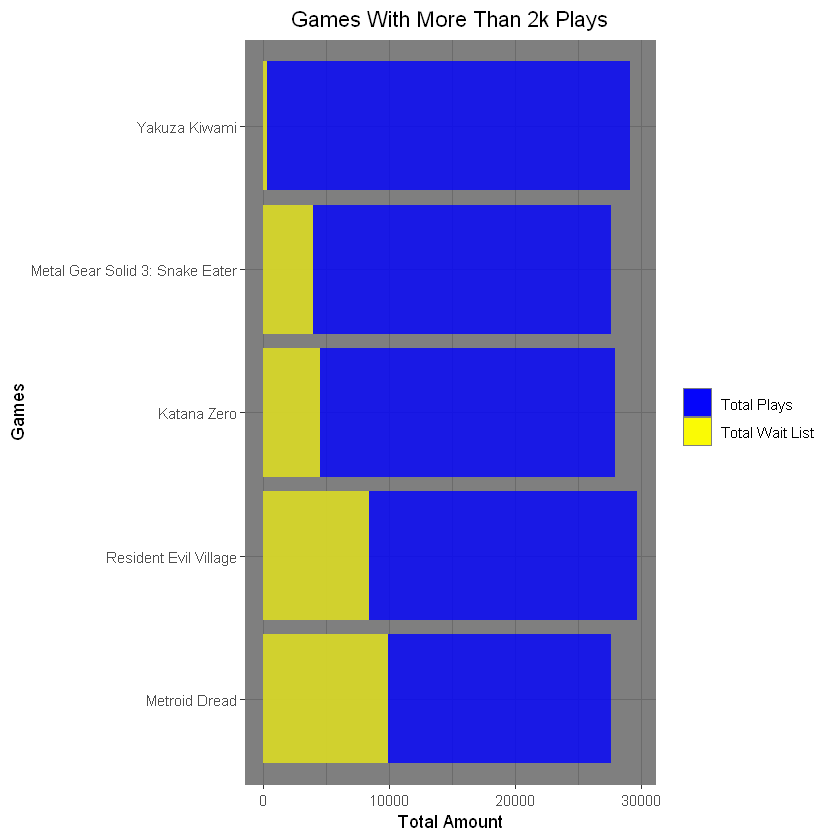

In [39]:
ggplot(desire_level, aes(x = reorder(title, -total_wait_list))) +
  coord_flip()+ 
    geom_col(aes(y = total_plays, fill = "Total Plays"), position = "dodge", alpha = 0.8) +
    geom_col(aes(y = total_wait_list, fill = "Total Wait List"), position = "dodge", alpha = 0.8) +
    labs(
        title = "Games With More Than 2k Plays",
        x = "Games",
        y = "Total Amount",
    ) +
    scale_fill_manual(values = c("Total Plays" = "blue", "Total Wait List" = "yellow")) +
    theme_dark() +
    theme(
        plot.title = element_text(hjust = 0.5),
        legend.title=element_blank()
    )

**Question:**<br>
What teams created succesful games
<br>
<br>
**What tables are we joining?:** <br>
game, review and user_activity

In [40]:
successful_teams = dbGetQuery(db, " SELECT DISTINCT g.team, ua.plays, r.number_of_reviews,
                                            CASE 
                                                WHEN ua.plays > 2000 AND r.number_of_reviews > 1000 THEN 'Successful'
                                                When ua.plays >= 500 AND r.number_of_reviews >= 500 THEN 'Average'
                                                ELSE 'Dead on Arrival'
                                            END AS Games_Success

                                    FROM game AS g
                                    INNER JOIN user_activity AS ua ON g.game_id = ua.game_id
                                    LEFT JOIN reviews AS r ON g.game_id = r.game_id

                                    -- Screen for NULL values 
                                    WHERE 
                                        r.number_of_reviews IS NOT NULL 
                                        AND ua.plays IS NOT NULL
                                        AND ua.plays > 2000 
                                        AND r.number_of_reviews > 1000  -- Additional filtering condition for successful games
                                    GROUP BY 
                                        g.team
                                    Having Games_Success ='Successful'
                                    ORDER BY 
                                        ua.plays DESC, ua.wishlist DESC
                                        LIMIT 5
")

successful_teams

team,plays,number_of_reviews,Games_Success
<chr>,<int>,<int>,<chr>
['Capcom'],9900,1800,Successful
"['Sonic Team', 'Sega']",9900,1100,Successful
"['Sega', 'Ryū Ga Gotoku Studios']",9700,1200,Successful
"['505 Games', 'Remedy Entertainment']",9600,1300,Successful
"['EA Redwood Shores', 'Electronic Arts']",9600,1200,Successful


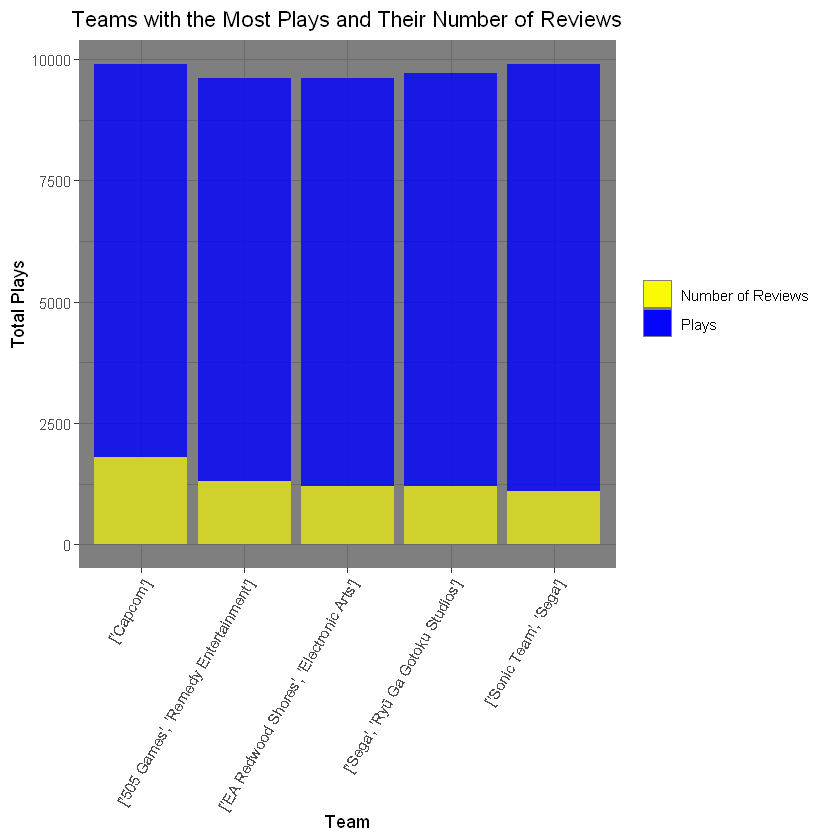

In [41]:
ggplot(successful_teams, aes(x = reorder(team, -number_of_reviews))) +
    geom_col(aes(y = plays, fill = "Plays"), position = "dodge", alpha = 0.8) +
    geom_col(aes(y = number_of_reviews, fill = "Number of Reviews"), position = "dodge", alpha = 0.8) +
    labs(
        title = "Teams with the Most Plays and Their Number of Reviews",
        x = "Team",
        y = "Total Plays",
    ) +
    scale_fill_manual(values = c("Plays" = "blue", "Number of Reviews" = "yellow")) +
    theme_dark() +
    theme(
        axis.text.x = element_text(angle = 60, hjust = 1),
        plot.title = element_text(hjust = 0.5),
        legend.title=element_blank()
    )


In [42]:
#Close the database connection :)
dbDisconnect(db)